### Арапов Степан , М8О-208б-19
### Системы аналитических вычислений. Лабораторная работа №3
Переделать на sage некоторые блоки из [книги](http://geometry.karazin.ua/resources/documents/20161211134615_988a1d6a.pdf):
1) Страница 247 - Модель "Хищник-Жертва".<br>
2) Страница 258 - Падение тела, брошенного под углом к горизонту.

*Переделать на Sage подразумевает, что ход решения и ответы остаются прежними, но функции, которые вы используете, не требуют импортирования пакетов*

#### Модель "Хищник-Жертва".

Исследуем двухвидовую модель «хищник – жертва», впервые построенную Вольтерра для объяснения колебаний рыбных уловов. Имеются два биологических вида, численностью в момент времени $t$ соответственно $x(t)$ и $y(t)$. Особи первого вида являются пищей для особей второго вида (хищников). Численности популяций в начальный момент времени известны. Требуется определить численность видов в произвольный момент времени. Математической моделью задачи является система дифференциальных уравнений Лотки – Вольтерра

$$
\begin{cases}
 \frac{dx}{dt} = (a-by)x\\
 \frac{dy}{dt} = (-c+dx)y
\end{cases}
$$

где $a, b, c, d$ – положительные константы. Проведем расчет численности популяций при $a = 3, c = 1, d = 1$ для трех значений параметра $b = 4,3,2$. Начальные значения положим $x(0) = 2$, $y(0) = 1$.

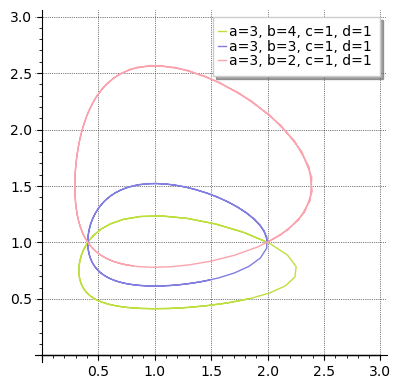

In [4]:
from numpy import linspace

a, c, d = 3, 1, 1
x0, y0 = 2, 1
t = linspace(0, 7, 71)

pt = plot(0, (x, 0, 3), color='black', gridlines=True)

for b in [4,3,2]:
    params = [3, b, 1, 1]
    st = 'a=%d b=%d c=%d d=%d' % tuple(params)
    f(y1, y2) = [y1 * (a - b*y2), y2 * (-c + d*y1)]
    solution = desolve_odeint(f, [x0, y0], t, dvars = [y1, y2]) 
    pt += line(solution, rgbcolor=(randint(0, 256) / 256, randint(0, 256) / 256, randint(0, 256) / 256),
               legend_label=('a={}, b={}, c={}, d={}'.format(a, b, c, d)))

pt.show(aspect_ratio=1, xmin=0, xmax=3, ymin=0, ymax=3)

#### Падение тела, брошенного под углом к горизонту.

Решим задачу Коши, описывающую движение тела, брошенного с начальной скоростью $v0$ под углом $\alpha$ к горизонту в предположении, что сопротивление воздуха пропорционально квадрату скорости. В векторной форме уравнение движения имеет вид

$$m \ddot{r} = -\gamma v |v|-mg$$

где $r(t)$ радиус – вектор движущегося тела,
$v = \dot{r}(t)$ – вектор скорости тела,
$\gamma$ – коэффициент сопротивления,
$mg$ вектор силы веса тела массы $m$,
$g$ – ускорение свободного падения. <br>

Особенность этой задачи состоит в том, что движение заканчивается в заранее неизвестный момент времени, когда тело падает на землю.

Если обозначить $k = \gamma /m$ , то в координатной форме мы имеем систему уравнений

$$
\begin{cases}
    \ddot{x} = -k\dot{x} \sqrt{\dot{x}^2 + \dot{y}^2}\\
    \ddot{y} = -k\dot{y} \sqrt{\dot{x}^2 + \dot{y}^2} - g
\end{cases}
$$
к которой следует добавить начальные условия: $x(0) = 0$,  $y(0) = h$  ($h$ начальная высота), $\dot{x}(0)=v_0\cos{\alpha}$,  $\dot{y}(0)=y_0\sin{\alpha}$.

Положим $y_1=x, y_2=\dot{x}, y_3 = y, y_4=\dot{y}$. Тогда соответствующая система ОДУ 1 – го порядка примет вид
$$
\begin{cases}
    y_1'= y_2\\
    y_2'= -ky_2\sqrt{y_2^2+y_4^2}\\
    y_3'= y_4\\
    y_4'= -ky_4\sqrt{y_2^2+y_4^2}-g\\
\end{cases}
$$

Для модельной задачи положим $h=0$, $k=0.01$, $g=9.81$, $v0=10$, $\alpha= \pi/4$.


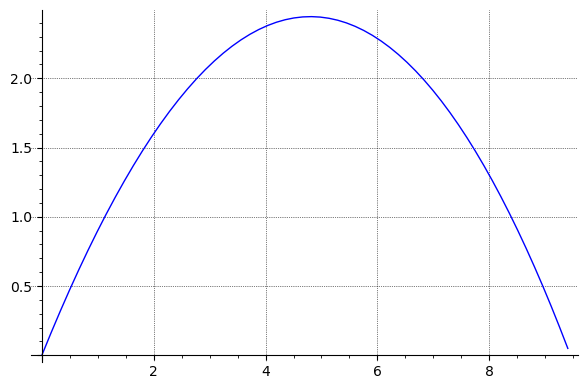

In [11]:
from numpy import linspace, pi, cos, sin

t = linspace(0, 7, 300) # интервал, на котором ищем решения
tmax = 1.41 # время движения, подбирается экспериментально
alph = pi/4 # угол бросания тела

k = 0.01
g = 9.81
v0 = 10.0 # начальная скорость

y0, t0 = [0, v0 * cos(alph), 0, v0 * sin(alph)], 0 # начальные условия
f(y1, y2, y3, y4) = [y2,  -k * y2 * sqrt(y2**2 + y4**2), y4,  -k * y4 * sqrt(y2**2 + y4**2) - g] # система функций
solution = desolve_odeint(f, y0, t, dvars=[y1, y2, y3, y4]) # решаем диффуры численно
arr = [[row[0], row[2]] for row in solution if row[0] >= 0 and row[2] >= 0]
line(arr).show(gridlines=True)